# TensorFlow 下的 ImageNet

## ImageNet 标签信息

为了获得 TensorFlow 下的 ImageNet，可以直接使用如下接口获取文件夹名称与类名的映射关系：

In [ ]:
from github import Github

g = Github(user_agent="xinetzone")
repo = g.get_repo("tensorflow/models")
label_content = repo.get_contents("research/slim/datasets/imagenet_lsvrc_2015_synsets.txt")
imagenet_labels = label_content.decoded_content.decode().split()
assert len(imagenet_labels) == 1000
metadata = repo.get_contents("research/slim/datasets/imagenet_metadata.txt")
imagenet_metadata = metadata.decoded_content.decode().splitlines()
synset_to_human = {}
for metadata in imagenet_metadata:
    name, value = metadata.split("\t")
    synset_to_human[name] = value
name2id = {name: k for k, name in enumerate(imagenet_labels)}

其中 `name2id` 是文件夹名称与 ID 的映射关系，`synset_to_human` 是文件夹名称与类名的映射关系。

为了方便使用，将其封装进如下包：

In [ ]:
from tvm_book.data.imagenet.classification import ImageNet1kAttr

imagenet1k_attr = ImageNet1kAttr()

`imagenet_labels` 对应于 `imagenet1k_attr.synset`：

In [ ]:
name2id[imagenet1k_attr.synset[0]]

`imagenet1k_attr.classes_long` 记录类名列表：

In [ ]:
ID = 0
assert synset_to_human[imagenet1k_attr.synset[ID]] == imagenet1k_attr.classes_long[ID]

## ImageNet 图像信息

[下载数据集](https://image-net.org/download-images)：

```python
import httpx
import gzip

imagenet_root_url = "https://image-net.org/data/ILSVRC/2012"
# train_res = httpx.get(f"{imagenet_root_url}/ILSVRC2012_img_train.tar")
val_res = httpx.get(f"{imagenet_root_url}/ILSVRC2012_img_val.tar")
devkit = httpx.get(f"{imagenet_root_url}/ILSVRC2012_devkit_t12.tar.gz")
with open("ILSVRC2012_devkit_t12.tar.gz", "wb") as fp:
    fp.write(devkit.content)
# 处理 devkit 文件

tar = gzip.open("ILSVRC2012_devkit_t12.tar.gz")
# 。。。。
```

此处便不展开了。

将下载好的数据解压到合适的位置，比如：

```bash
--ILSVRC
    --train
    --val
```

In [33]:
from tvm_book.data.classification import ImageFolderDataset

root = "/media/pc/data/lxw/home/data/datasets/ILSVRC/val"
valset = ImageFolderDataset(root)

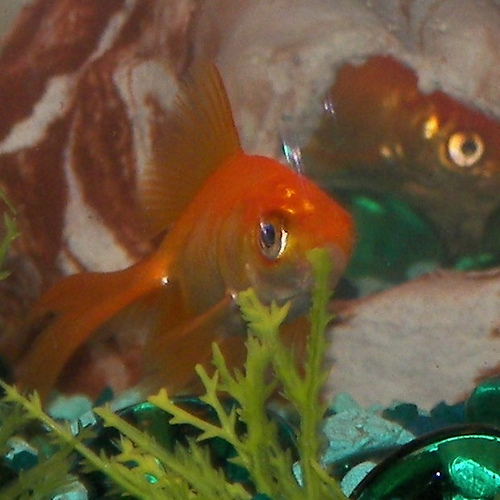

In [41]:
from PIL import Image
data, label = valset[81]
Image.fromarray(data)